In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données 
# MetroPT3_corrected.csv : Dataset avec des observations (lignes) vides, 
# timestamp avec des gaps de 10 sec respectés + tag de la panne

df = pd.read_csv(r"..\..\..\Datasources\MetroPT3_new_imputed_final.csv", delimiter=",", decimal=".", index_col=0)
df.reset_index(drop=True, inplace=True)

In [2]:
# Afficher un apercu des données
display(df.head(2))

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,...,Motor_current_is_missing,COMP_is_missing,DV_eletric_is_missing,Towers_is_missing,MPG_is_missing,LPS_is_missing,Pressure_switch_is_missing,Oil_level_is_missing,Caudal_impulses_is_missing,panne
0,2020-04-12 11:20:00,9.128,8.650,-0.018,-0.022,8.648,55.475,6.0175,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-12 11:20:10,9.354,8.896,-0.016,-0.020,8.892,56.525,6.0075,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.dtypes)

timestamp                      object
TP2                           float64
TP3                           float64
H1                            float64
DV_pressure                   float64
Reservoirs                    float64
Oil_temperature               float64
Motor_current                 float64
COMP                          float64
DV_eletric                    float64
Towers                        float64
MPG                           float64
LPS                           float64
Pressure_switch               float64
Oil_level                     float64
Caudal_impulses               float64
TP2_is_missing                  int64
TP3_is_missing                  int64
H1_is_missing                   int64
DV_pressure_is_missing          int64
Reservoirs_is_missing           int64
Oil_temperature_is_missing      int64
Motor_current_is_missing        int64
COMP_is_missing                 int64
DV_eletric_is_missing           int64
Towers_is_missing               int64
MPG_is_missi

In [4]:
# Dataset commence le 2020-04-12 11:20:00 et se termine le 2020-07-17 06:00:00
pannes = [
    {'id': 'Panne1',  'start': '2020-04-12 11:50:00', 'end': '2020-04-12 23:30:00'},
    {'id': 'Panne2',  'start': '2020-04-18 00:00:00', 'end': '2020-04-18 23:59:00'},
    {'id': 'Panne3',  'start': '2020-04-19 00:00:00', 'end': '2020-04-19 01:30:00'},
    {'id': 'Panne4',  'start': '2020-04-29 03:20:00', 'end': '2020-04-29 04:00:00'},
    {'id': 'Panne5',  'start': '2020-04-29 22:00:00', 'end': '2020-04-29 22:20:00'},
    {'id': 'Panne6',  'start': '2020-05-13 14:00:00', 'end': '2020-05-13 23:59:00'},
    {'id': 'Panne7',  'start': '2020-05-18 05:00:00', 'end': '2020-05-18 05:30:00'},
    {'id': 'Panne8',  'start': '2020-05-19 10:10:00', 'end': '2020-05-19 11:00:00'},
    {'id': 'Panne9',  'start': '2020-05-19 22:10:00', 'end': '2020-05-19 23:59:00'},
    {'id': 'Panne10', 'start': '2020-05-20 00:00:00', 'end': '2020-05-20 20:00:00'},
    {'id': 'Panne11', 'start': '2020-05-23 09:50:00', 'end': '2020-05-23 10:10:00'},
    {'id': 'Panne12', 'start': '2020-05-29 23:30:00', 'end': '2020-05-29 23:59:00'},
    {'id': 'Panne13', 'start': '2020-05-30 00:00:00', 'end': '2020-05-30 06:00:00'},
    {'id': 'Panne14', 'start': '2020-06-01 15:00:00', 'end': '2020-06-01 15:40:00'},
    {'id': 'Panne15', 'start': '2020-06-03 10:00:00', 'end': '2020-06-03 11:00:00'},
    {'id': 'Panne16', 'start': '2020-06-05 10:00:00', 'end': '2020-06-05 23:59:00'},
    {'id': 'Panne17', 'start': '2020-06-06 00:00:00', 'end': '2020-06-06 23:59:00'},
    {'id': 'Panne18', 'start': '2020-06-07 00:00:00', 'end': '2020-06-07 14:30:00'},
    {'id': 'Panne19', 'start': '2020-07-08 17:30:00', 'end': '2020-07-08 19:00:00'},
    {'id': 'Panne20', 'start': '2020-07-15 14:30:00', 'end': '2020-07-15 19:00:00'},
    {'id': 'Panne21', 'start': '2020-07-17 04:30:00', 'end': '2020-07-17 05:30:00'}
         ]

In [5]:
continuous_features  = ["TP2","TP3","H1","DV_pressure","Reservoirs","Oil_temperature","Motor_current"]
categorical_features = ["COMP","DV_eletric","Towers","MPG", "LPS","Pressure_switch","Oil_level","Caudal_impulses"]

In [6]:
# Conserver uniquement les colonnes originales, les 'is_missing' ne rentrent pas dans l'EDA
columns_to_keep = ["timestamp", "panne"] + continuous_features + categorical_features
df = df[columns_to_keep]

In [7]:
# Convertir timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)

timestamp          datetime64[ns]
panne                       int64
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
dtype: object


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

# Statistiques descriptives globales
print("Statistiques descriptives :")
display(df.describe())

# Statistiques pour les colonnes spécifiques
print("\nNombre de valeurs manquantes par colonne :")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).map("{:,.2f}%".format)
missing_stats = pd.DataFrame({
    'Valeurs manquantes': missing_counts.map("{:,}".format),
    'Pourcentage manquant': missing_percent
})

display(missing_stats)

Statistiques descriptives :


,panne,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,"827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00","827,521.00"
mean,0.06,1.70,7.22,7.22,0.11,7.22,61.47,2.50,0.62,0.38,0.71,0.61,0.00,0.78,0.77,0.77
std,0.24,3.17,3.38,3.30,0.48,3.39,7.40,2.14,0.49,0.48,0.46,0.49,0.07,0.42,0.42,0.42
min,0.00,-0.03,0.77,-0.04,-0.03,0.75,19.83,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,-0.01,8.11,7.66,-0.02,8.11,52.86,0.04,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
50%,0.00,-0.01,8.63,8.38,-0.02,8.63,61.90,3.15,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
75%,0.00,1.39,9.32,9.16,0.04,9.32,66.95,3.80,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00
max,1.00,10.68,10.29,10.29,7.87,10.29,89.05,9.27,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00



Nombre de valeurs manquantes par colonne :


,Valeurs manquantes,Pourcentage manquant
timestamp,0,0.00%
panne,0,0.00%
TP2,0,0.00%
TP3,0,0.00%
H1,0,0.00%
DV_pressure,0,0.00%
Reservoirs,0,0.00%
Oil_temperature,0,0.00%
Motor_current,0,0.00%
COMP,0,0.00%


In [9]:
# Identifier les doublons
duplicated_rows = df[df.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")

Nombre de doublons : 0


In [10]:
# Détection des doublons dans les timestamps
duplicated_timestamps = df[df['timestamp'].duplicated()]
print(f"Nombre de doublons dans les timestamps : {len(duplicated_timestamps)}")


Nombre de doublons dans les timestamps : 0


In [11]:
# Vérifier les cardinalité des variables discretes
var_a_verifier = ['COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses']

print("----------------------------------")
for feature in var_a_verifier :
   print("Cardinalités de la variable ",feature,":")
   print(df[feature].value_counts())
   print("----------------------------------")

----------------------------------
Cardinalités de la variable  COMP :
1.00    510305
0.00    317216
Name: COMP, dtype: int64
----------------------------------
Cardinalités de la variable  DV_eletric :
0.00    514714
1.00    312807
Name: DV_eletric, dtype: int64
----------------------------------
Cardinalités de la variable  Towers :
1.00    584400
0.00    243121
Name: Towers, dtype: int64
----------------------------------
Cardinalités de la variable  MPG :
1.00    505414
0.00    322107
Name: MPG, dtype: int64
----------------------------------
Cardinalités de la variable  LPS :
0.00    823964
1.00      3557
Name: LPS, dtype: int64
----------------------------------
Cardinalités de la variable  Pressure_switch :
1.00    642787
0.00    184734
Name: Pressure_switch, dtype: int64
----------------------------------
Cardinalités de la variable  Oil_level :
1.00    638037
0.00    189484
Name: Oil_level, dtype: int64
----------------------------------
Cardinalités de la variable  Caudal_imp

### Analyse des données manquantes

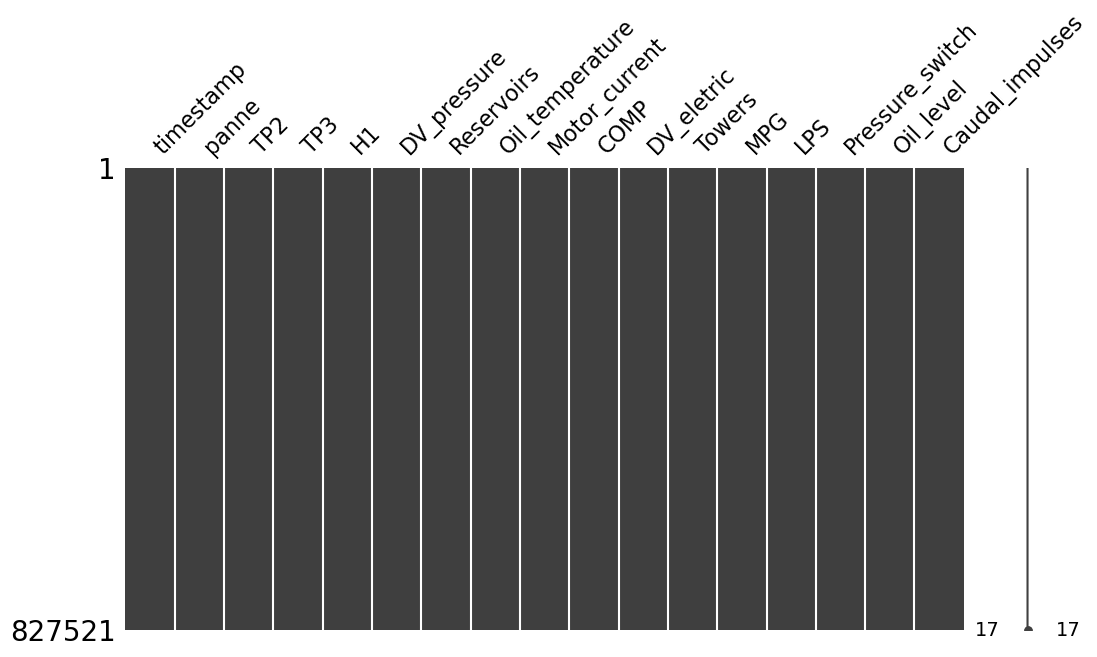

In [12]:
# Distribution des données manquantes dans le temps :
import missingno as msno

msno.matrix(df, figsize=(12, 6))  # Visualisation des données manquantes
plt.show()

In [13]:
# Filtrer uniquement les colonnes numériques dans un DataFrame
numeric_columns = df.select_dtypes(include=[np.number])

In [14]:
#############################################################
### Trouver les irrégularités temporelles dans le dataset ###
#############################################################

# Calculer le gap (saut) entre chaque 2 observations consecutives.
time_diffs_seconds = df['timestamp'].diff().dt.total_seconds().dropna()
display(time_diffs_seconds)
# Fonction pour convertir les secondes en une durée lisible
def format_duration(seconds):
    days, seconds = divmod(seconds, 86400)  # 86400 secondes dans un jour
    hours, seconds = divmod(seconds, 3600)  # 3600 secondes dans une heure
    minutes, seconds = divmod(seconds, 60)  # 60 secondes dans une minute
    components = [
        f"{int(days)} jours" if days > 0 else "",
        f"{int(hours)} heures" if hours > 0 else "",
        f"{int(minutes)} minutes" if minutes > 0 else "",
        f"{int(seconds)} secondes" if seconds > 0 else "",
    ]
    return ", ".join(filter(None, components))  # Filtrer les parties vides

# Calculer les statistiques nécessaires
min_interval = time_diffs_seconds.min()  # Le minimum d'intervalle
max_interval = time_diffs_seconds.max()  # Le maximum d'intervalle
mode_interval = time_diffs_seconds.mode()[0]  # Le mode (valeur la plus fréquente)

# Identifier les irrégularités
irregular_intervals = time_diffs_seconds[time_diffs_seconds != mode_interval]
num_irregularities = len(irregular_intervals)  # Nombre total d'irrégularités

# Améliorer l'affichage du max
max_interval_formatted = format_duration(max_interval)

# Afficher les résultats
print("Résumé des intervalles de temps :")
print(f"Min : {min_interval} secondes")  # Le plus petit intervalle
print(f"Max : {max_interval} secondes ({max_interval_formatted})")  # Le plus grand intervalle, formaté
print(f"Mode (valeur typique) : {mode_interval} secondes")
print(f"Nombre d'irrégularités : {num_irregularities}")


# Calculer le nombre d'irrégularités par classe (par valeur unique d'intervalle)
interval_counts = time_diffs_seconds.value_counts().sort_index()

# Afficher le nombre d'irrégularités par classe d'intervalle
print("\nNombre d'irrégularités par classe d'intervalle :")
for interval, count in interval_counts.items():
    duration_formatted = format_duration(interval)
    print(f"{duration_formatted}: {count} observations")

1        10.00
2        10.00
3        10.00
4        10.00
5        10.00
          ... 
827516   10.00
827517   10.00
827518   10.00
827519   10.00
827520   10.00
Name: timestamp, Length: 827520, dtype: float64

Résumé des intervalles de temps :
Min : 10.0 secondes
Max : 10.0 secondes (10 secondes)
Mode (valeur typique) : 10.0 secondes
Nombre d'irrégularités : 0

Nombre d'irrégularités par classe d'intervalle :
10 secondes: 827520 observations


# Analyse graphique des Séries Temporelles

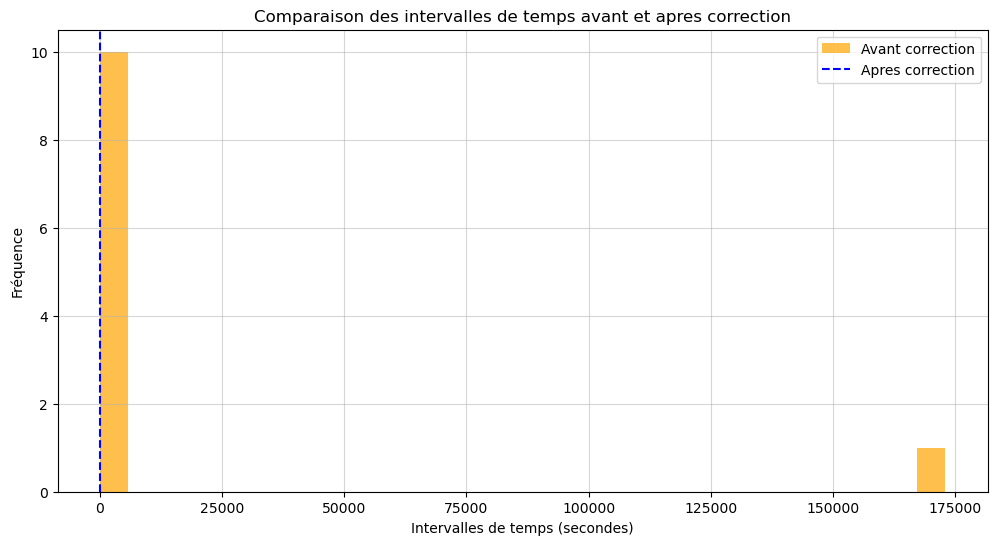

In [15]:
# Comparaison des intervalles de temps avant et apres correction
before_correction = [8, 9, 10, 11, 12, 13, 14, 15, 20, 120, 172918]  # Exemples d'intervalles avant correction
after_correction = [10] * 1841759  # Tous les intervalles sont désormais de 10 secondes

# Visualisation
plt.figure(figsize=(12, 6))
plt.hist(before_correction, bins=30, alpha=0.7, label='Avant correction', color='orange')
plt.axvline(10, color='blue', linestyle='--', label='Apres correction')
plt.title("Comparaison des intervalles de temps avant et apres correction")
plt.xlabel("Intervalles de temps (secondes)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [ ]:
# Visualisations des distribution univariées (Histogrammes)

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

In [ ]:
# Liste des colonnes continues
continous_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 
                     'Oil_temperature', 'Motor_current']

# Génération des visualisations
for col in continous_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Variables discretes identifiées
discrete_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'panne']

# Distribution des catégories pour chaque variable discrete
for col in discrete_columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot(kind='bar', alpha=0.7)
    plt.title(f"Distribution des catégories pour {col}")
    plt.xlabel("Catégories")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', alpha=0.5)
    plt.show()


In [ ]:
# Visualisation des séries temporelles 

# Variables continues à tracer
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df[col], marker='.', linestyle='-', markersize=2, alpha=0.7)
    plt.title(f"Évolution de {col} dans le temps")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
# Visualiser les tendances de chaque variable numérique par rapport au temps et a l'intervalle de la panne

for col in df.columns[1:-1]:  # Exclure 'Panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer les valeurs de la variable
    plt.plot(df['timestamp'], df[col], label=col, color='blue', alpha=0.7)
    
    # Ajouter des zones colorées pour les périodes de panne
    for i in range(len(df)):
        if df.loc[i, 'panne'] == 1:
            plt.axvspan(df.loc[i, 'timestamp'], df.loc[i, 'timestamp'], color='red', alpha=0.3)
    
    # Ajouter des labels et une légende
    plt.title(f"Évolution de {col} dans le temps (avec périodes de panne)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
##########################
### Zoom sur la panne1 ###
##########################

# Panne 1
# Définir la panne spécifique
panne_start = pd.Timestamp('2020-04-18 00:00')
panne_end   = pd.Timestamp('2020-04-18 23:59')


# Définir une fenêtre de 60 minutes avant et apres
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et apres)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
##########################
### Voir & examiner les tendances des variables sur les 4 pannes###
##########################

# Distribution des features par rapport au temps et les 4 pannes en meme temps


# Ajouter une fenêtre de 60 minutes avant et apres chaque panne
for panne in pannes:
    panne['window_start'] = panne['start'] - pd.Timedelta(minutes=60)
    panne['window_end'] = panne['end'] + pd.Timedelta(minutes=60)

# Filtrer les données pour toutes les pannes
filtered_data = pd.DataFrame()
for panne in pannes:
    window_data = df[(df['timestamp'] >= panne['window_start']) & 
                           (df['timestamp'] <= panne['window_end'])]
    filtered_data = pd.concat([filtered_data, window_data])

# Supprimer les doublons apres concaténation (au cas où des fenêtres se chevauchent)
filtered_data = filtered_data.drop_duplicates(subset='timestamp').sort_values('timestamp')

# Visualiser les variables continues avec les 4 périodes de panne
for col in df.columns[1:-1]:  # Exclure 'timestamp', 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(filtered_data['timestamp'], filtered_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence les périodes de panne
    for panne in pannes:
        plt.axvspan(panne['start'], panne['end'], color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour des 4 pannes")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
##########################
### Zoom sur la panne4 ###
##########################

# Définir la panne spécifique
panne_start = pd.Timestamp('2020-07-15 14:30')
panne_end   = pd.Timestamp('2020-07-15 19:00')


# Définir une fenêtre de 60 minutes avant et apres
window_start = panne_start - pd.Timedelta(minutes=60)
window_end = panne_end + pd.Timedelta(minutes=60)

# Filtrer les données dans cette fenêtre
window_data = df[(df['timestamp'] >= window_start) & (df['timestamp'] <= window_end)]

# Visualiser les variables continues
for col in df.columns[1:-1]:  # Exclure 'timestamp' et 'panne'
    plt.figure(figsize=(12, 6))
    
    # Tracer la série temporelle
    plt.plot(window_data['timestamp'], window_data[col], label=col, color='blue', alpha=0.7)
    
    # Mettre en évidence la panne
    plt.axvspan(panne_start, panne_end, color='red', alpha=0.3, label='Période de panne')
    
    # Ajouter des labels et une légende
    plt.title(f"{col} autour de la panne (60 minutes avant et apres)")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()


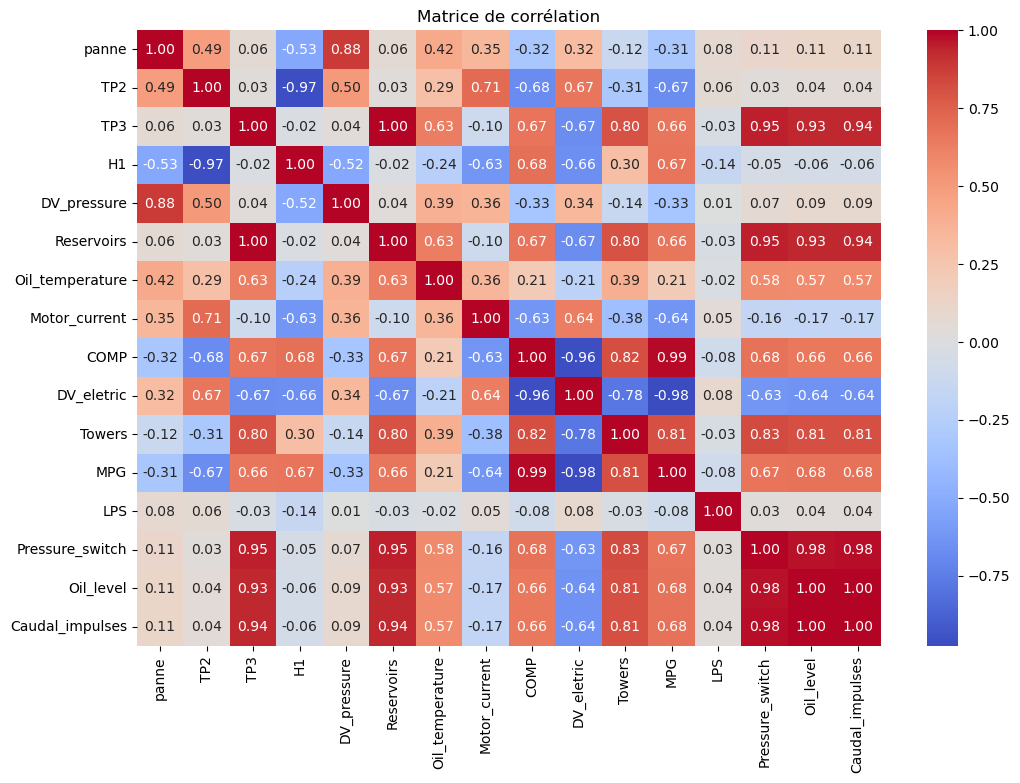

In [16]:
# Analyse des corrélations

# Sélection des colonnes numériques uniquement
numeric_columns = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Affichage avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation")
plt.show()

### Analyse temporelle avancée

In [ ]:
############################################################
### Voir les tendances et les saisonnalités temporelles ####
############################################################

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Liste des variables continues
numeric_columns = ["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current"]

# Décomposition pour chaque variable
for col in numeric_columns:
    print(f"Décomposition de la série temporelle pour {col}")
    try:
        decomposition = seasonal_decompose(df[col].dropna(), model="additive", period=144)  # period = 144 (une journée si les données sont toutes les 10 secondes)
        decomposition.plot()
        plt.show()
    except ValueError as e:
        print(f"Impossible de décomposer {col} : {e}")



<ul style="font-family: times, serif; font-size:12pt; color:blue;">
    <li><strong>Le graphique montre une décomposition des séries temporelles en quatre composantes principales.</strong></li>
    <li>Voici une analyse des différentes parties affichées :</li>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>1. Série originale (TP2)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            Il s'agit de la série temporelle brute telle qu'elle est dans ton dataset (variable TP2).
            On remarque des variations dans la densité des données (des zones vides indiquent des lacunes dans les observations).
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            La série montre des périodes où les données sont absentes. Cela affecte les autres composantes de la décomposition.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>2. Tendance (Trend)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            La composante tendance capture les changements à long terme dans les données. Elle montre les évolutions ou variations progressives dans la série.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            La tendance semble fluctuer significativement, avec des pics et des chutes dans certaines zones. Cela peut refléter des variations dans la pression/température ou des anomalies dans les mesures.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>3. Saisonniere (Seasonal)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            La composante saisonniere capture les variations périodiques ou cycliques qui se répetent à intervalles réguliers dans les données.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            Dans ce graphique, la composante saisonniere est presque nulle. Cela indique soit un manque de cyclicité dans les données, soit une perturbation due aux lacunes.
        </li>
    </ul>
</ul>

<ul style="font-family: times, serif; font-size:12pt; color:green;">
    <li><strong>4. Résiduelles (Resid)</strong></li>
    <ul style="font-family: times, serif; font-size:12pt; color:black;">
        <li><strong>Ce que cela représente :</strong></li>
        <li>
            Les résiduelles sont la partie des données qui ne peut pas être expliquée par la tendance ou la saisonnalité. Elles représentent les bruits ou anomalies.
        </li>
        <li><strong>Interprétation :</strong></li>
        <li>
            Les résiduelles semblent contenir une certaine variabilité et bruit, probablement influencées par les lacunes dans les données. Certaines variations inhabituelles pourraient être des anomalies à analyser.
        </li>
    </ul>
</ul>


# Stratégie d'imputation : Choix de la méthode d'imputation

<h3>Imputation des valeurs manquantes :</h3>
<ul style="font-family: times, serif; font-size:12pt; color:blue;">
    <li><strong>Utiliser des méthodes adaptées aux types de données :</strong>
        <ul style="color:black;">
            <li><strong>Variables continues :</strong> Imputation basée sur les séries temporelles (interpolation linéaire, KNN, modeles prédictifs).</li>
            <li><strong>Variables catégoriques :</strong> Imputation par mode ou par apprentissage supervisé.</li>
        </ul>
    </li>
    <li>
        <strong>Prioriser des approches temporelles :</strong>
        <ul style="color:black;">
            <li>Interpolation ou régression sur des fenêtres temporelles pour respecter la nature séquentielle des données.</li>
        </ul>
    </li>
</ul>

In [ ]:
# Analyse des features pour la classification de "panne"

# Résumé de l'analyse :
# 1. Les corrélations entre les variables et la cible "panne" ont été étudiées.
#    - "DV_pressure" montre une forte corrélation positive avec "panne" (0.64).
#    - "TP2" présente une corrélation négative significative (-0.28).
#    - "Oil_temperature" et "Motor_current" ont des corrélations modérées avec "panne" (0.25 et 0.19 respectivement).
# 2. Certaines variables, comme "H1" et "TP2", sont fortement redondantes (-0.96 de corrélation).
#    - "TP2" a été priorisée car elle est mieux corrélée à "panne".
# 3. "Reservoirs" est exclue en raison de sa corrélation très faible avec "panne" (0.02) 
#    et sa forte redondance avec "TP3" (1.00).
# 4. Parmi les variables catégoriques, "COMP", "Towers", et "DV_eletric" semblent utiles.
#    - Ces variables pourraient améliorer la classification.

# Features finales retenues :
# Colonnes continues :
# - "DV_pressure", "TP2", "Oil_temperature", "Motor_current"
# Colonnes catégoriques :
# - "COMP", "Towers" ou "DV_eletric" (à tester pour confirmer leur importance)

# Ces features équilibrent la pertinence et limitent la redondance, et devraient être testées dans un modèle.


In [ ]:
import matplotlib.pyplot as plt

# Définir les périodes de panne comme des plages de temps
pannes = [
    {'start': pd.Timestamp('2020-04-18 00:00:00'), 'end': pd.Timestamp('2020-04-18 23:59:00')},
    {'start': pd.Timestamp('2020-05-29 23:30:00'), 'end': pd.Timestamp('2020-05-30 06:00:00')},
    {'start': pd.Timestamp('2020-06-05 10:00:00'), 'end': pd.Timestamp('2020-06-07 14:30:00')},
    {'start': pd.Timestamp('2020-07-15 14:30:00'), 'end': pd.Timestamp('2020-07-15 19:00:00')}
]

# Créer un graphique pour chaque variable continue
for col in continuous_features:
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df[col], label=col, color='blue', alpha=0.7)
    
    # Ajouter des zones rouges pour les périodes de panne
    for panne in pannes:
        plt.axvspan(panne['start'], panne['end'], color='red', alpha=0.3, label='Période de panne')
    
    # Configurer les labels, titre et légende
    plt.title(f'Évolution de {col} dans le temps avec périodes de panne')
    plt.xlabel('Temps')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
# Définir les intervalles de temps
fenetres = [
    {'name': 'Fenetre 1',        'start': '2020-02-01 00:00:00', 'end': '2020-04-17 23:45:00'},
    {'name': 'Fenetre 2',        'start': '2020-04-17 23:45:00', 'end': '2020-04-17 23:59:50'},
    {'name': 'Fenetre Panne 1',  'start': '2020-04-18 00:00:00', 'end': '2020-04-18 23:59:00'},
    {'name': 'Fenetre 3',        'start': '2020-04-18 23:59:10', 'end': '2020-05-29 23:15:00'},
    {'name': 'Fenetre 4',        'start': '2020-05-29 23:15:00', 'end': '2020-05-29 23:29:50'},
    {'name': 'Fenetre Panne 2',  'start': '2020-05-29 23:30:00', 'end': '2020-05-30 06:00:00'},
    {'name': 'Fenetre 5',        'start': '2020-05-30 06:00:10', 'end': '2020-06-05 09:45:00'},
    {'name': 'Fenetre 6',        'start': '2020-06-05 09:45:00', 'end': '2020-06-05 09:59:50'},
    {'name': 'Fenetre Panne 3',  'start': '2020-06-05 10:00:00', 'end': '2020-06-07 14:30:00'},
    {'name': 'Fenetre 7',        'start': '2020-06-07 14:30:10', 'end': '2020-07-15 14:15:00'},
    {'name': 'Fenetre 8',        'start': '2020-07-15 14:15:00', 'end': '2020-07-15 14:29:50'},
    {'name': 'Fenetre Panne 4',  'start': '2020-07-15 14:30:00', 'end': '2020-07-15 19:00:00'},
    {'name': 'Fenetre 9',        'start': '2020-07-15 19:00:10', 'end': '2020-09-01 03:59:50'},
]

# Convertir les timestamps en datetime pour faciliter le filtrage
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Initialiser une liste pour stocker les résultats
resultats = []

# Parcourir chaque fenêtre pour calculer les valeurs min et max
for fenetre in fenetres:
    # Filtrer les données pour cette fenêtre
    df_fenetre = df[(df['timestamp'] >= fenetre['start']) & (df['timestamp'] <= fenetre['end'])]
    
    # Calculer les min et max pour chaque variable continue
    min_max_values = {
        'Fenetre': fenetre['name'],
    }
    for col in continuous_features:
        min_max_values[f'{col}_min'] = df_fenetre[col].min()
        min_max_values[f'{col}_max'] = df_fenetre[col].max()
    
    # Ajouter les résultats pour cette fenêtre
    resultats.append(min_max_values)

# Convertir les résultats en DataFrame pour affichage
df_resultats = pd.DataFrame(resultats)
display(df_resultats)


In [ ]:
# Initialiser une structure pour stocker les min et max pour chaque variable et fenêtre
resultats = []

# Calculer les valeurs min et max pour chaque fenêtre et chaque variable
for fenetre in fenetres:
    # Filtrer les données pour cette fenêtre
    start = pd.Timestamp(fenetre['start'])
    end = pd.Timestamp(fenetre['end'])
    df_fenetre = df[(df['timestamp'] >= start) & (df['timestamp'] <= end)]
    
    # Si la fenêtre contient des données, calculer les min et max
    if not df_fenetre.empty:
        for col in continuous_features:
            resultats.append({
                'Fenetre': fenetre['name'],
                'Variable': col,
                'Min': df_fenetre[col].min(),
                'Max': df_fenetre[col].max(),
                'Is_Panne': "Panne" in fenetre['name']  # Indicateur si c'est une période de panne
            })

# Convertir les résultats en DataFrame
df_resultats = pd.DataFrame(resultats)

# Parcourir chaque variable pour tracer ses min et max par fenêtre
for col in continuous_features:
    df_variable = df_resultats[df_resultats['Variable'] == col]
    
    plt.figure(figsize=(12, 6))
    
    # Tracer les min et max pour chaque fenêtre
    for _, row in df_variable.iterrows():
        color = 'red' if row['Is_Panne'] else 'blue'
        label = 'Période de panne' if row['Is_Panne'] else 'Période normale'
        plt.scatter(row['Fenetre'], row['Min'], color=color, label=label, alpha=0.7)
        plt.scatter(row['Fenetre'], row['Max'], color=color, alpha=0.9)
    
    # Configurer le graphique
    plt.title(f'Min et Max pour {col} par Fenêtre')
    plt.xlabel('Fenêtres')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    #plt.legend(loc='upper right')
    plt.show()
